# Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
df = pd.read_csv('Airline_Delay_Cause.csv')

# Show the first few rows of the data
df.head()

# Check for missing values
df.isnull().sum()

# Basic statistics summary
df.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,171666.000000,171666.000000,171426.000000,171223.000000,171426.000000,171426.000000,171426.000000,171426.000000,171426.000000,171426.000000,171426.000000,171426.00000,171426.000000,171426.000000,171426.000000,171426.000000,171426.000000
mean,2018.551361,6.493633,362.528467,66.434387,20.796615,2.250347,19.381147,0.157096,23.770554,7.530497,0.863387,4239.48733,1437.185124,222.563497,920.651704,7.382725,1651.700063
std,2.890006,3.440908,992.894662,179.540694,50.315176,7.314252,61.675244,0.717405,72.393477,43.654880,3.772853,12618.56605,4215.677812,821.086511,3423.509335,41.779985,5221.878385
min,2013.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,4.000000,50.000000,6.000000,2.160000,0.000000,1.000000,0.000000,1.230000,0.000000,0.000000,335.00000,110.000000,0.000000,34.000000,0.000000,65.000000
50%,2019.000000,7.000000,100.000000,17.000000,6.400000,0.400000,3.910000,0.000000,5.000000,1.000000,0.000000,1018.00000,375.000000,18.000000,146.000000,0.000000,320.000000
75%,2021.000000,9.000000,250.000000,47.000000,17.260000,1.860000,11.710000,0.000000,15.260000,4.000000,1.000000,2884.00000,1109.000000,146.000000,477.000000,0.000000,1070.000000
max,2023.000000,12.000000,21977.000000,4176.000000,1293.910000,266.420000,1884.420000,58.690000,2069.070000,4951.000000,197.000000,438783.00000,196944.000000,31960.000000,112018.000000,3760.000000,227959.000000


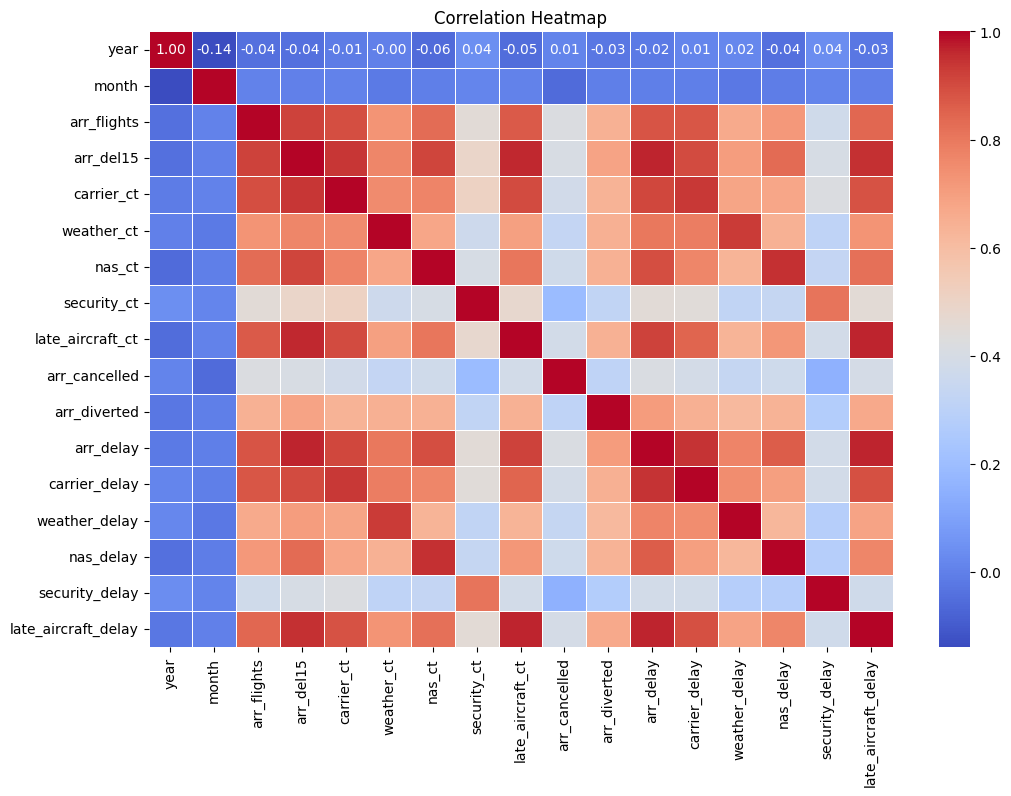

C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


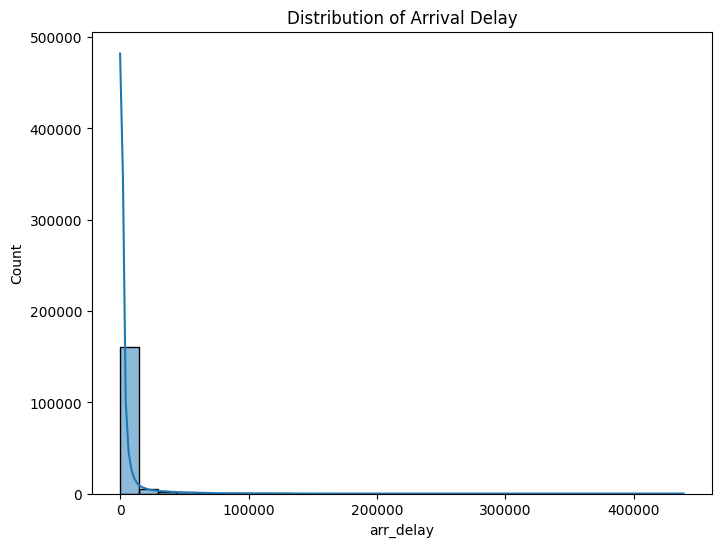

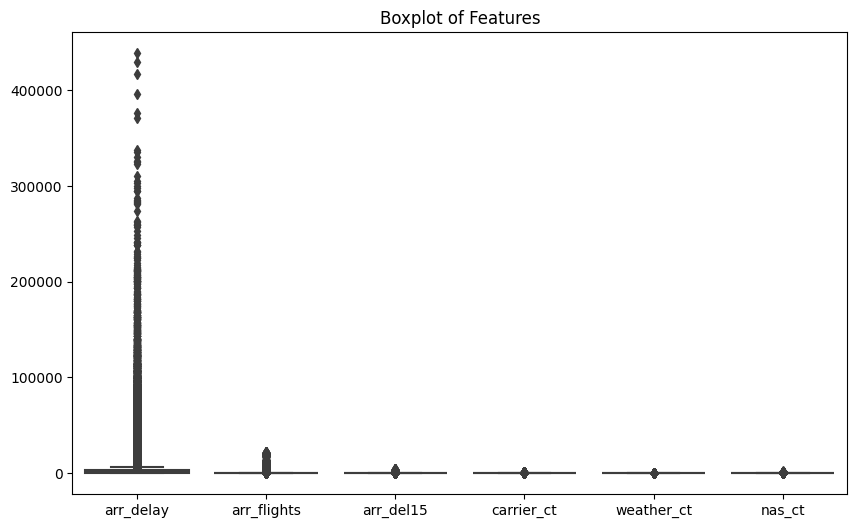

In [2]:
# Convert non-numeric columns to numeric or drop them
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Check for non-numeric columns and exclude them from the correlation matrix
# Alternatively, encode categorical variables (like 'carrier') if needed

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Distribution of 'arr_delay' (Arrival Delay)
plt.figure(figsize=(8, 6))
sns.histplot(df['arr_delay'], bins=30, kde=True)
plt.title('Distribution of Arrival Delay')
plt.show()

# Boxplot for numerical features vs 'arr_delay'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['arr_delay', 'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct']])
plt.title('Boxplot of Features')
plt.show()


# Feature Engineering and Preprocessing

In [3]:
# Handling missing values (drop rows with missing 'arr_delay')
df = df.dropna(subset=['arr_delay'])

# Encoding categorical variables (for example, 'carrier', 'airport' can be encoded as integers)
label_encoder = LabelEncoder()
df['carrier'] = label_encoder.fit_transform(df['carrier'])
df['airport'] = label_encoder.fit_transform(df['airport'])

# Select features for modeling (excluding 'arr_delay' as target)
X = df[['year', 'month', 'carrier', 'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted']]
y = df['arr_delay']


# Train/Test Split

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Initialize the Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the Decision Tree model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(f'Decision Tree MSE: {mse_dt}')
print(f'Decision Tree R2 Score: {r2_dt}')


Decision Tree MSE: 8921400.782989949
Decision Tree R2 Score: 0.9470148481004337


In [6]:
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest MSE: {mse_rf}')
print(f'Random Forest R2 Score: {r2_rf}')


Random Forest MSE: 4979286.217989174
Random Forest R2 Score: 0.970427487450782


In [9]:
import pickle
pickle.dump(rf_model, open('rf_model.pkl', 'wb'))

# Visualization of the graphs

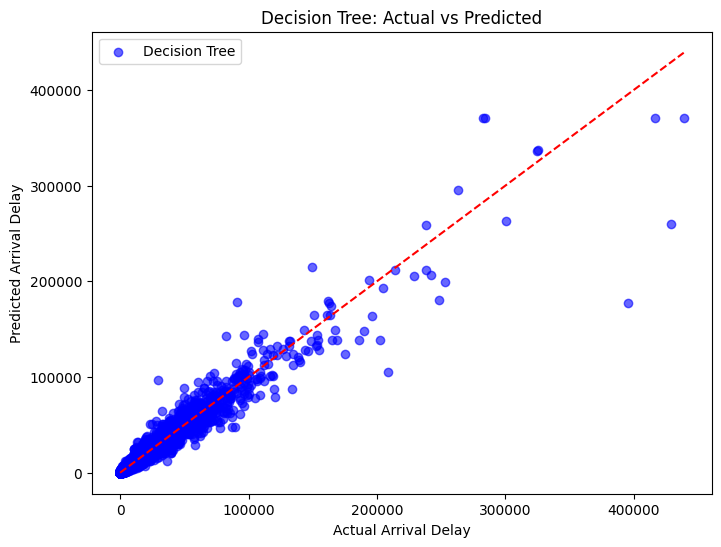

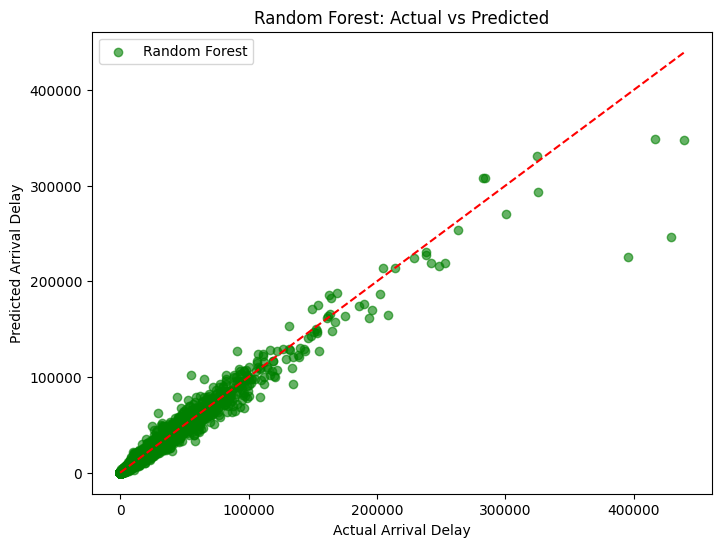

In [7]:
# Plotting actual vs predicted values for Decision Tree
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_dt, color='blue', alpha=0.6, label='Decision Tree')
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Arrival Delay')
plt.ylabel('Predicted Arrival Delay')
plt.title('Decision Tree: Actual vs Predicted')
plt.legend()
plt.show()

# Plotting actual vs predicted values for Random Forest
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color='green', alpha=0.6, label='Random Forest')
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Arrival Delay')
plt.ylabel('Predicted Arrival Delay')
plt.title('Random Forest: Actual vs Predicted')
plt.legend()
plt.show()

In [8]:
# Make predictions using the Random Forest model
y_pred_rf = rf_model.predict(X_test)

# Combine actual values and predictions into a DataFrame for comparison
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})

# Sort the DataFrame by the predicted values to get the top 10 predictions
top_10_predictions = predictions_df.sort_values(by='Predicted', ascending=False).head(10)

# Print the top 10 predictions
print("Top 10 Predictions:")
print(top_10_predictions)

Top 10 Predictions:
          Actual  Predicted
3237    416577.0  349080.99
1684    438783.0  347392.52
3493    324572.0  330892.67
82479   283977.0  307715.84
157955  282186.0  307553.08
163954  325690.0  293122.19
4790    300098.0  269996.43
101362  262779.0  253718.73
121329  429194.0  245832.72
131364  238253.0  230329.30
